# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#dc322f; font-size:140%; text-align:center; border-radius:25px 60px;">📡Telecom Customer Churn Prediction📡</p>

<img src="https://www.einfochips.com/blog/wp-content/uploads/2018/10/top-emerging-technologies-enabling-digital-transformation-in-telecom-industry-featured.jpg" alt="Telecom">

<div style="background-color:#87CEEB; padding:8px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>Dataset Information:</strong>
    <p>The Customer Churn dataset contains information on all <strong>7,043 customers</strong> from a Telecommunications company in California in Q2 2022.</p>
</div>
<div style="background-color:#87CEEB; padding:8px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>Notebook Objective:</strong>
    <p>In this notebook, we evaluate the performance of a machine learning model both with and without the application of Principal Component Analysis (PCA). Our aim is to comprehend the impact of dimensionality reduction on both the accuracy of the model and its computational efficiency. Additionally, we address various preprocessing techniques within this notebook, including filling missing values, normalization, anomaly detection, and oversampling. Through these analyses, we strive to gain insights into the effectiveness of these techniques in enhancing the performance and robustness of the machine learning model.</p>
</div>



<a id="table of content"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Table of Content</p>

<a id="contents_tabel"></a>   

* [1. Importing Libraries](#1)
    
* [2. Loading the Dataset](#2)
    
* [3. Dataset Overview](#3)  

* [4. EDA and Visualization](#17)
    
    * [4.1. Visualization of Nominal Features](#4)  

    * [4.2. Filling Null Values in Nominal Features](#5)
    
    * [4.3. Label Encoding](#6)

    * [4.4. Visualization of Numerical Features)](#7)

    * [4.5. Filling Null Nalues in Numerical Features](#8)

* [5. Preprocessing(Normalization, Anomaly Detection, and Oversampling)](#9)

* [6. Model Training without PCA](#10)

    * [6.1 Model Selection: SVM](#11)
    
    * [6.2 Model Selection: Random Forest](#12)
    
* [7.  Model Training with PCA](#13)

    * [7.1.  Model Selection: SVM](#14)
    
    * [7.2. Model Selection: Random Forest](#15)

* [8.  Conclusion](#16)

<a id="1"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Importing Libraries</p>
☝🏻 [Tabel of Contents](#contents_tabel)

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC, OneClassSVM
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA

from time import perf_counter

import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Loading the Dataset</p>
☝🏻 [Tabel of Contents](#contents_tabel)

In [94]:
!pip install gdown
!gdown --id 1pRVk_O_hy9LVuHNWbDrdagZlI8WgRUNr -O dataset.csv
data = pd.read_csv('dataset.csv')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pRVk_O_hy9LVuHNWbDrdagZlI8WgRUNr
To: /content/dataset.csv
100% 1.44M/1.44M [00:00<00:00, 61.3MB/s]


<a id="3"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Dataset Overview</p>
☝🏻 [Tabel of Contents](#contents_tabel)

In [95]:
data

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


<div style="background-color:#87CEEB; padding:7px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <p>This dataset has <strong>7043 records</strong> of customers and <strong>37 features</strong>. Customer status is the target.</p>
    <p>Each record represents one customer and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more!</p>
</div>


In [96]:
# data.describe(include='all').T

In [97]:
print(data.shape)
print(data.dtypes)
print(data.info())

(7043, 38)
Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object

In [98]:
data = data.drop(['Customer ID', 'City', 'Zip Code', 'Churn Category', 'Churn Reason'], axis=1)

In [99]:
data.duplicated().sum()

0

<a id="17"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> EDA and Visualization</p>

<a id="4"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Visualization of Nominal Features</p>
☝🏻 [Tabel of Contents](#contents_tabel)



In [100]:
df1 = data.select_dtypes(exclude='number')

In [101]:
df1.describe().T

,count,unique,top,freq
Gender,7043,2,Male,3555
Married,7043,2,No,3641
Offer,7043,6,None,3877
Phone Service,7043,2,Yes,6361
Multiple Lines,6361,2,No,3390
Internet Service,7043,2,Yes,5517
Internet Type,5517,3,Fiber Optic,3035
Online Security,5517,2,No,3498
Online Backup,5517,2,No,3088
Device Protection Plan,5517,2,No,3095


In [102]:
# visualization style
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

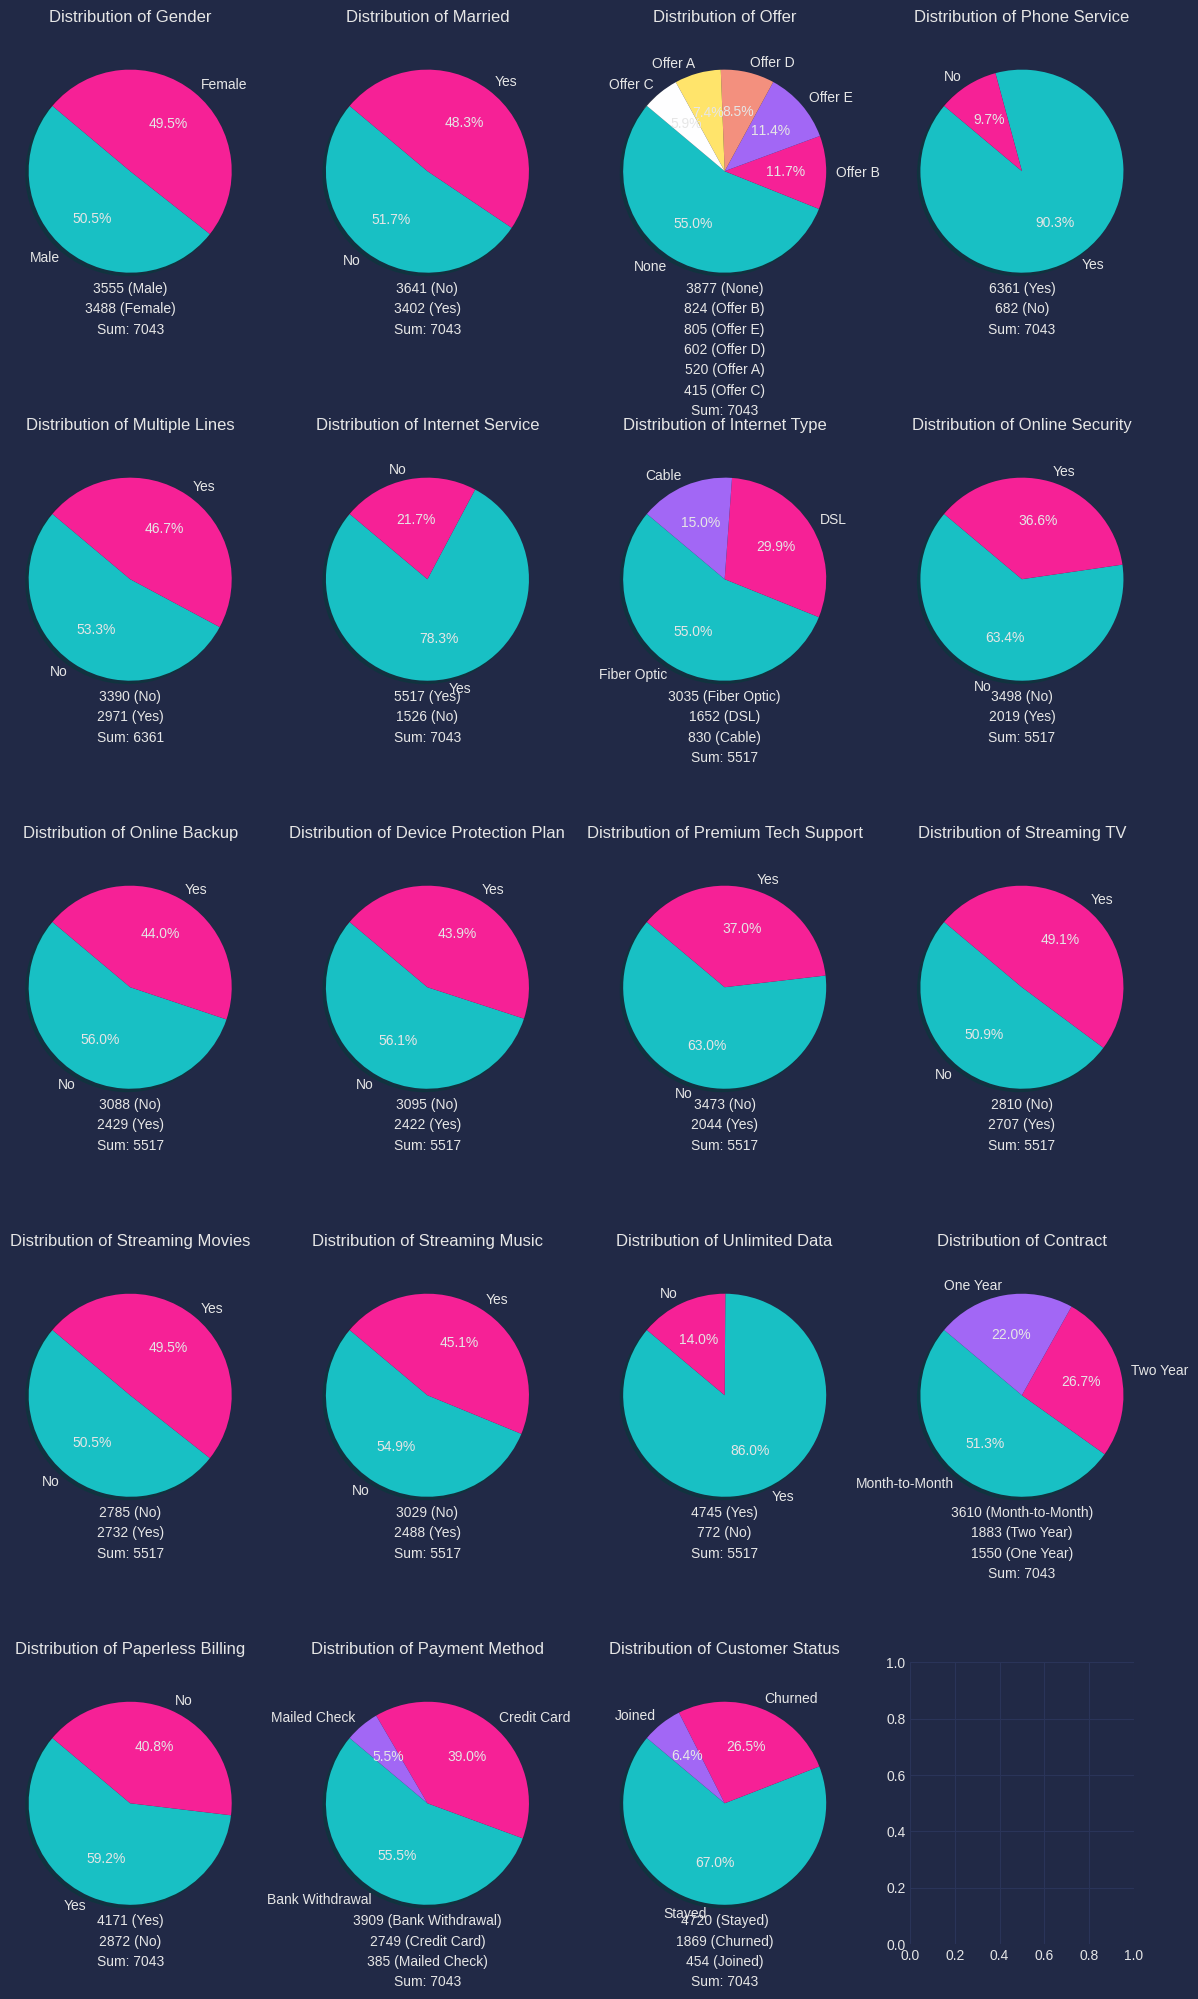

In [103]:
# Plotting the pie chart
num_rows = 5
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

for i, column in enumerate(df1.columns):
    categories = df1[column].value_counts()

    ax = axes[i // num_cols, i % num_cols]

    ax.pie(categories, labels=categories.index, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal')
    ax.set_title(f'Distribution of {column}')

    # Add text annotations for value count and sum
    total = categories.values.sum()
    sum_text = f'Sum: {total}'
    ax.text(0, -1.2 - len(categories)*0.2, sum_text, ha='center')

    for j, percentage in enumerate(categories):
        percent_text = f'{percentage} ({categories.index[j]})'
        ax.text(0, -1.2 - j*0.2, percent_text, ha='center')

plt.tight_layout()
plt.show()

<a id="5"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Filling Null Values in Nominal Features</p>
☝🏻 [Tabel of Contents](#contents_tabel)

null values in nominal features:
Gender                       0
Married                      0
Offer                        0
Phone Service                0
Multiple Lines             682
Internet Service             0
Internet Type             1526
Online Security           1526
Online Backup             1526
Device Protection Plan    1526
Premium Tech Support      1526
Streaming TV              1526
Streaming Movies          1526
Streaming Music           1526
Unlimited Data            1526
Contract                     0
Paperless Billing            0
Payment Method               0
Customer Status              0
dtype: int64


<Axes: >

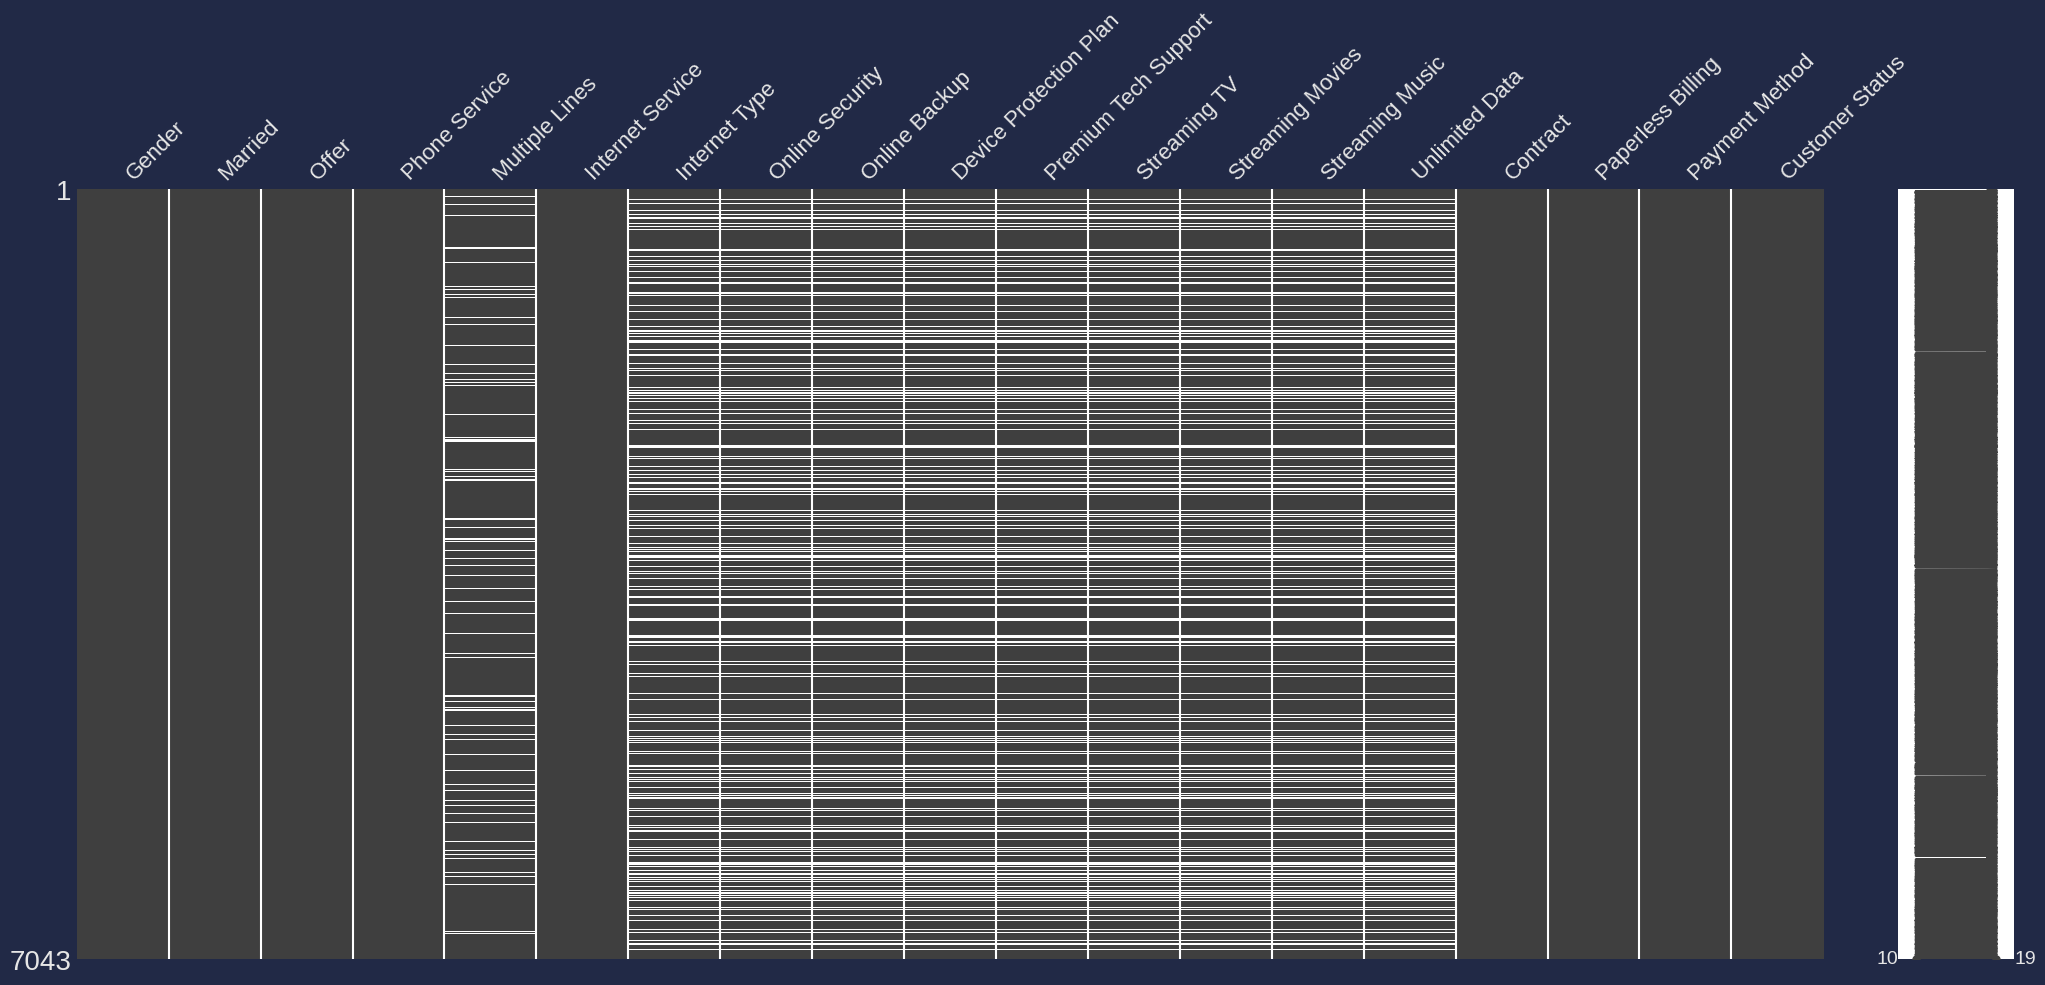

In [104]:
#checking null values
print(f"null values in nominal features:\n{df1.isna().sum()}")
msno.matrix(df1)

<div style="background-color:#87CEEB; padding:8px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <p>The internet service status indicates whether the customer is subscribed to internet service with the company, denoted as "Yes" or "No."</p>
    <p>The total number of customers subscribing to internet services is <strong>5,517</strong>.</p>
    <p>As depicted in the preceding visualization, certain features are contingent upon internet service subscription. In other words, these features become accessible when the customer subscribes to internet service. These features include:</p>
    <ul style="text-align: left;">
        <li>Internet Type</li>
        <li>Online Security</li>
        <li>Online Backup</li>
        <li>Device Protection Plan</li>
        <li>Premium Tech Support</li>
        <li>Streaming TV</li>
        <li>Streaming Movies</li>
        <li>Streaming Music</li>
        <li>Unlimited Data</li>
    </ul>
    <p>Based on the aforementioned findings, it's evident that customers who don't subscribe to internet services have null values in the mentioned features. Consequently, to standardize these features for analysis, the null values within these columns should be replaced with "No."</p>
</div>


In [105]:
#filling null values
df1['Internet Type'] = df1['Internet Type'].apply(lambda x: 'None' if pd.isnull(x) else x)
df1['Offer'] = df1['Offer'].apply(lambda x: 'None' if pd.isnull(x) else x)

column_name = ['Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
               'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
for column in column_name:
  df1[column] = df1[column].apply(lambda x: 'No' if pd.isnull(x) else x)

<Axes: >

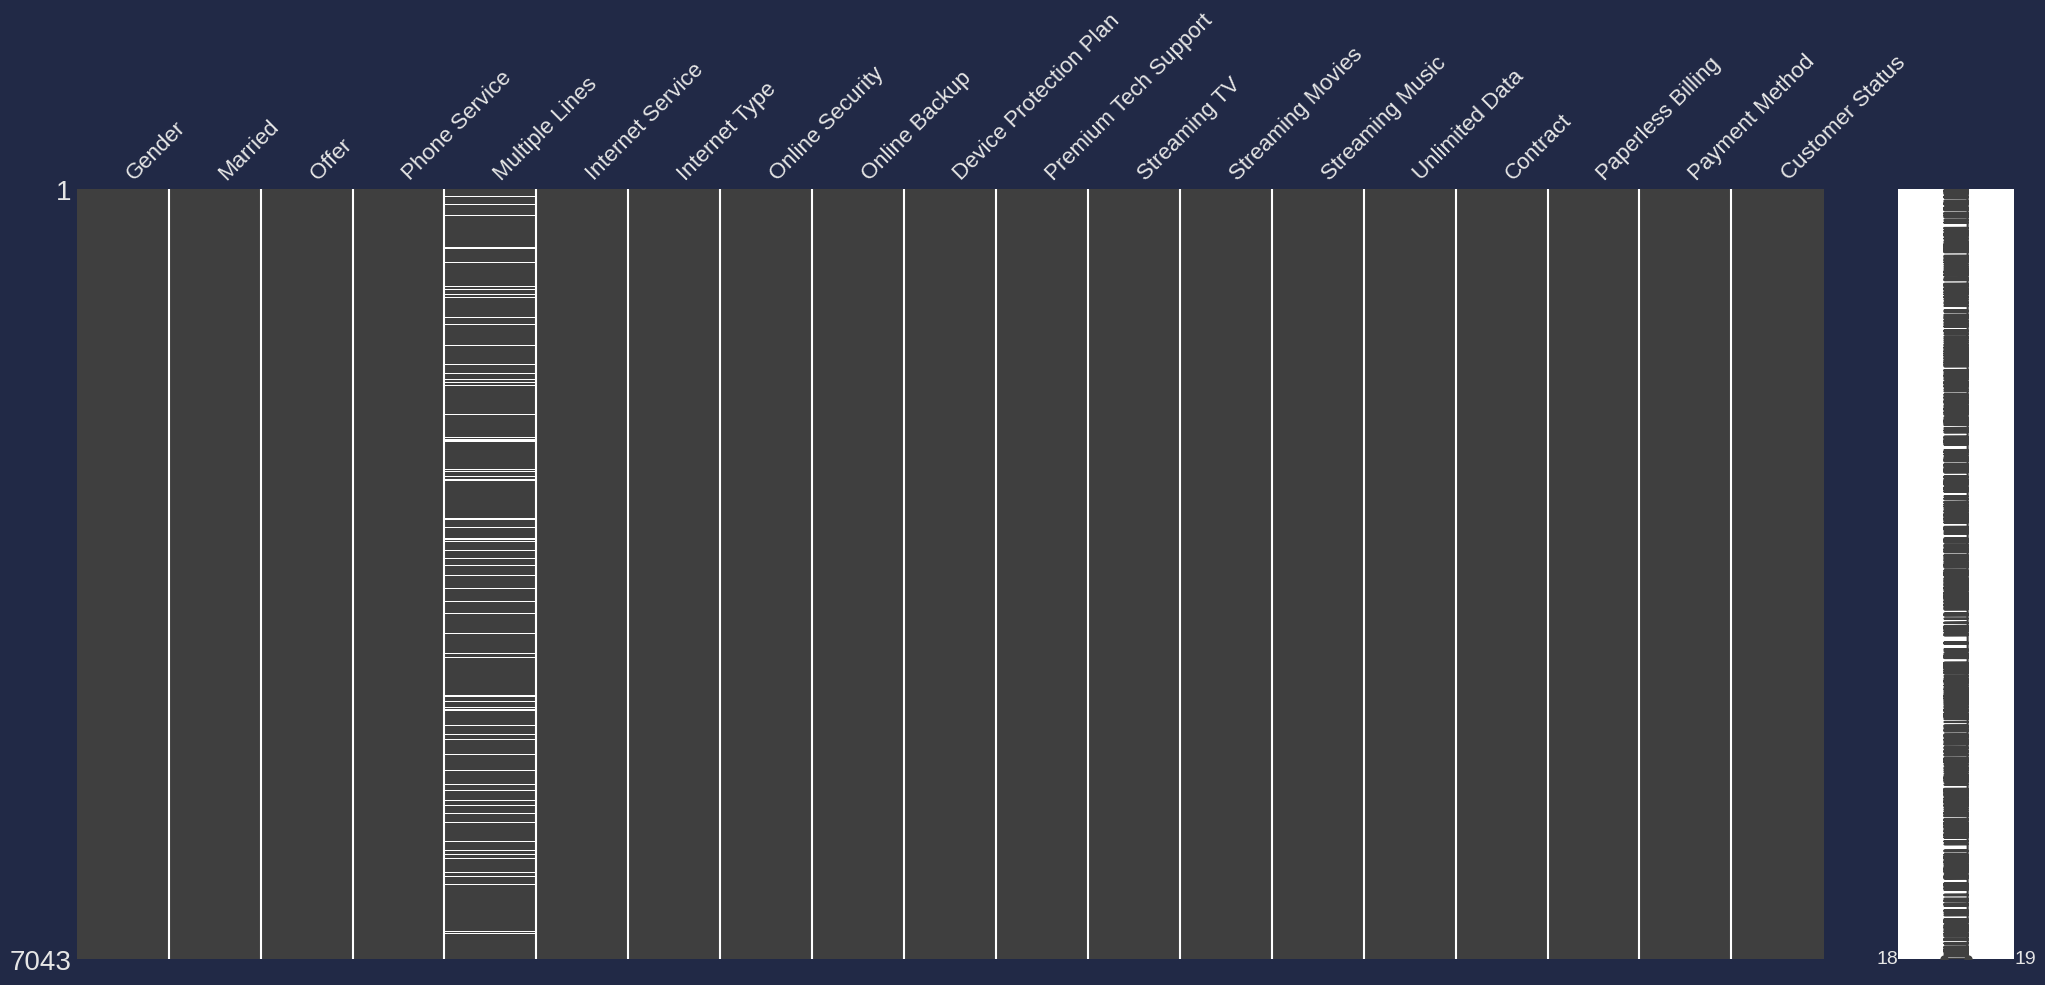

In [106]:
msno.matrix(df1)

<div style="background-color:#87CEEB; padding:8px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <p>I have made the decision to address missing values in the '<strong>Multiple Line</strong>' feature using the <strong>KNN imputer</strong> technique. As KNN imputer operates with numerical data, it necessitates that categorical features be converted into numerical representations. Therefore, prior to applying the KNN imputer, we will undertake the conversion of categorical features into numerical formats. This preprocessing step ensures compatibility with the imputation process, facilitating the effective handling of missing data within the '<strong>Multiple Line</strong>' feature.</p>
</div>

<a id="6"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Label Encoding</p>
☝🏻 [Tabel of Contents](#contents_tabel)

In [107]:
# first step:
conversion_dict = {"Yes": 1, "No": 0}
df1['Multiple Lines'] = df1['Multiple Lines'].map(conversion_dict)

# second step: labeling the target by using LabelEncoder
label_encoder = LabelEncoder()
df1['Customer Status'] = label_encoder.fit_transform(df1['Customer Status'])

# third step: using pd.get_dummies for other features
df1 = pd.get_dummies(df1, drop_first=True)

In [108]:
# Extract the label column before imputation
label_column = df1['Customer Status']
df1 = df1.drop(columns=['Customer Status'])

# the KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df1)
# imputed_data = np.round(imputed_data)

# If we want to keep the DataFrame format:
df1_imputed = pd.DataFrame(data=imputed_data, columns=df1.columns)

# Reattach the label column
df1_imputed['Customer Status'] = label_column

<Axes: >

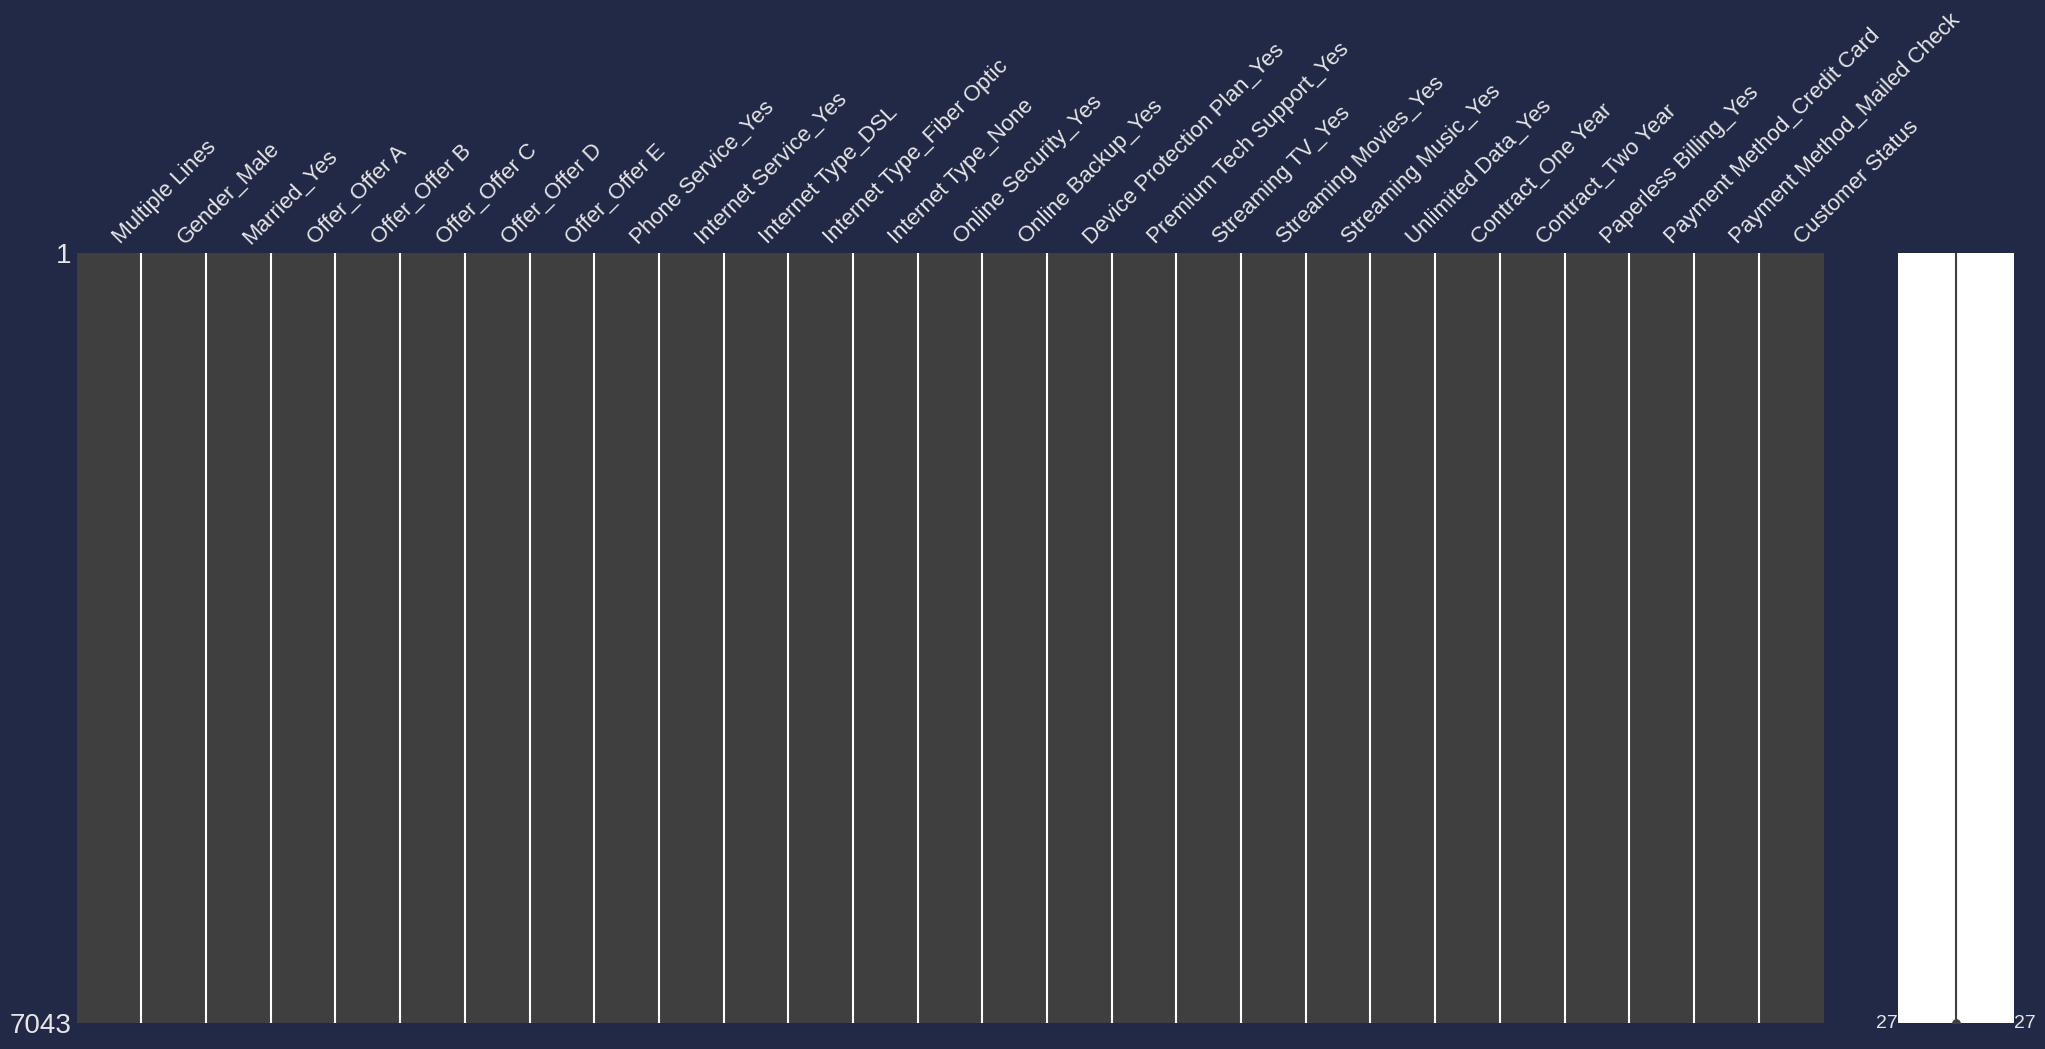

In [109]:
# checking missing value
msno.matrix(df1_imputed)

<a id="7"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Visualization of Numerical Features</p>
☝🏻 [Tabel of Contents](#contents_tabel)

In [110]:
df2 = data.select_dtypes(include='number')

In [111]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.010000,13.050000,25.690000,37.680000,49.990000
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.000000,13.000000,21.000000,30.000000,85.000000
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000
Total Charges,7043.0,2280.381264,2266.220462,18.800000,400.150000,1394.550000,3786.600000,8684.800000


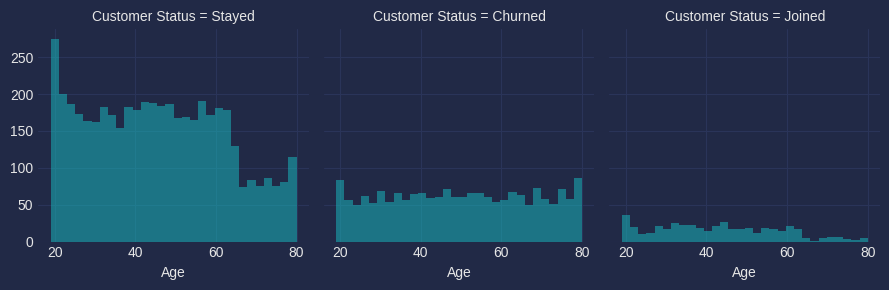

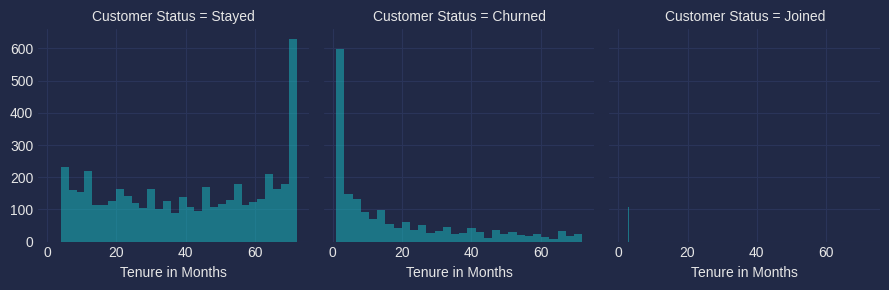

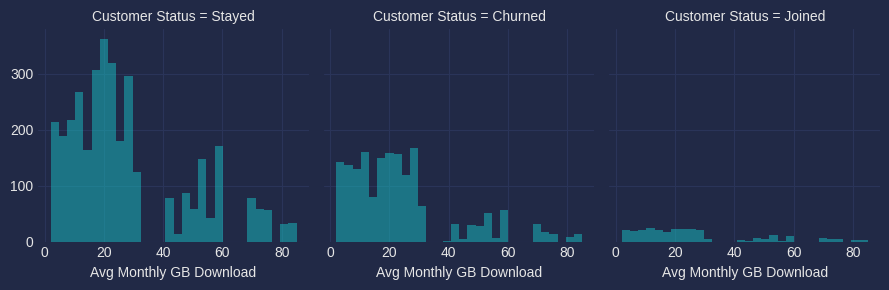

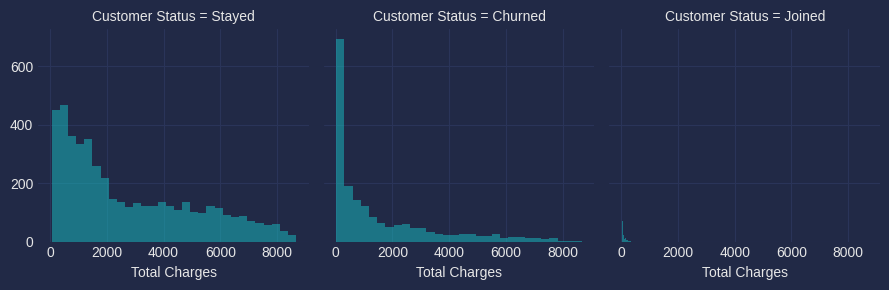

In [112]:
# Visualization
column_name = ['Age', 'Tenure in Months', 'Avg Monthly GB Download', 'Total Charges']
for column in column_name:
  v = sns.FacetGrid(data, col='Customer Status')
  v.map(plt.hist, column, alpha=0.5, bins=30)
  plt.show

In [113]:
# visualization
'''
column_name = [
    #'Age',
    'Total Charges']
indices_name = ['Gender', 'Married', 'Offer', 'Phone Service', 'Internet Service', 'Contract', 'Payment Method']
for column in column_name:
    for k in indices_name:
      v = sns.FacetGrid(data, col='Customer Status', row=k, margin_titles=True)
      v.map(plt.hist, column, alpha=0.5, bins=30)
      plt.show
'''

"\ncolumn_name = [\n    #'Age',\n    'Total Charges']\nindices_name = ['Gender', 'Married', 'Offer', 'Phone Service', 'Internet Service', 'Contract', 'Payment Method']\nfor column in column_name:\n    for k in indices_name:\n      v = sns.FacetGrid(data, col='Customer Status', row=k, margin_titles=True)\n      v.map(plt.hist, column, alpha=0.5, bins=30)\n      plt.show\n"

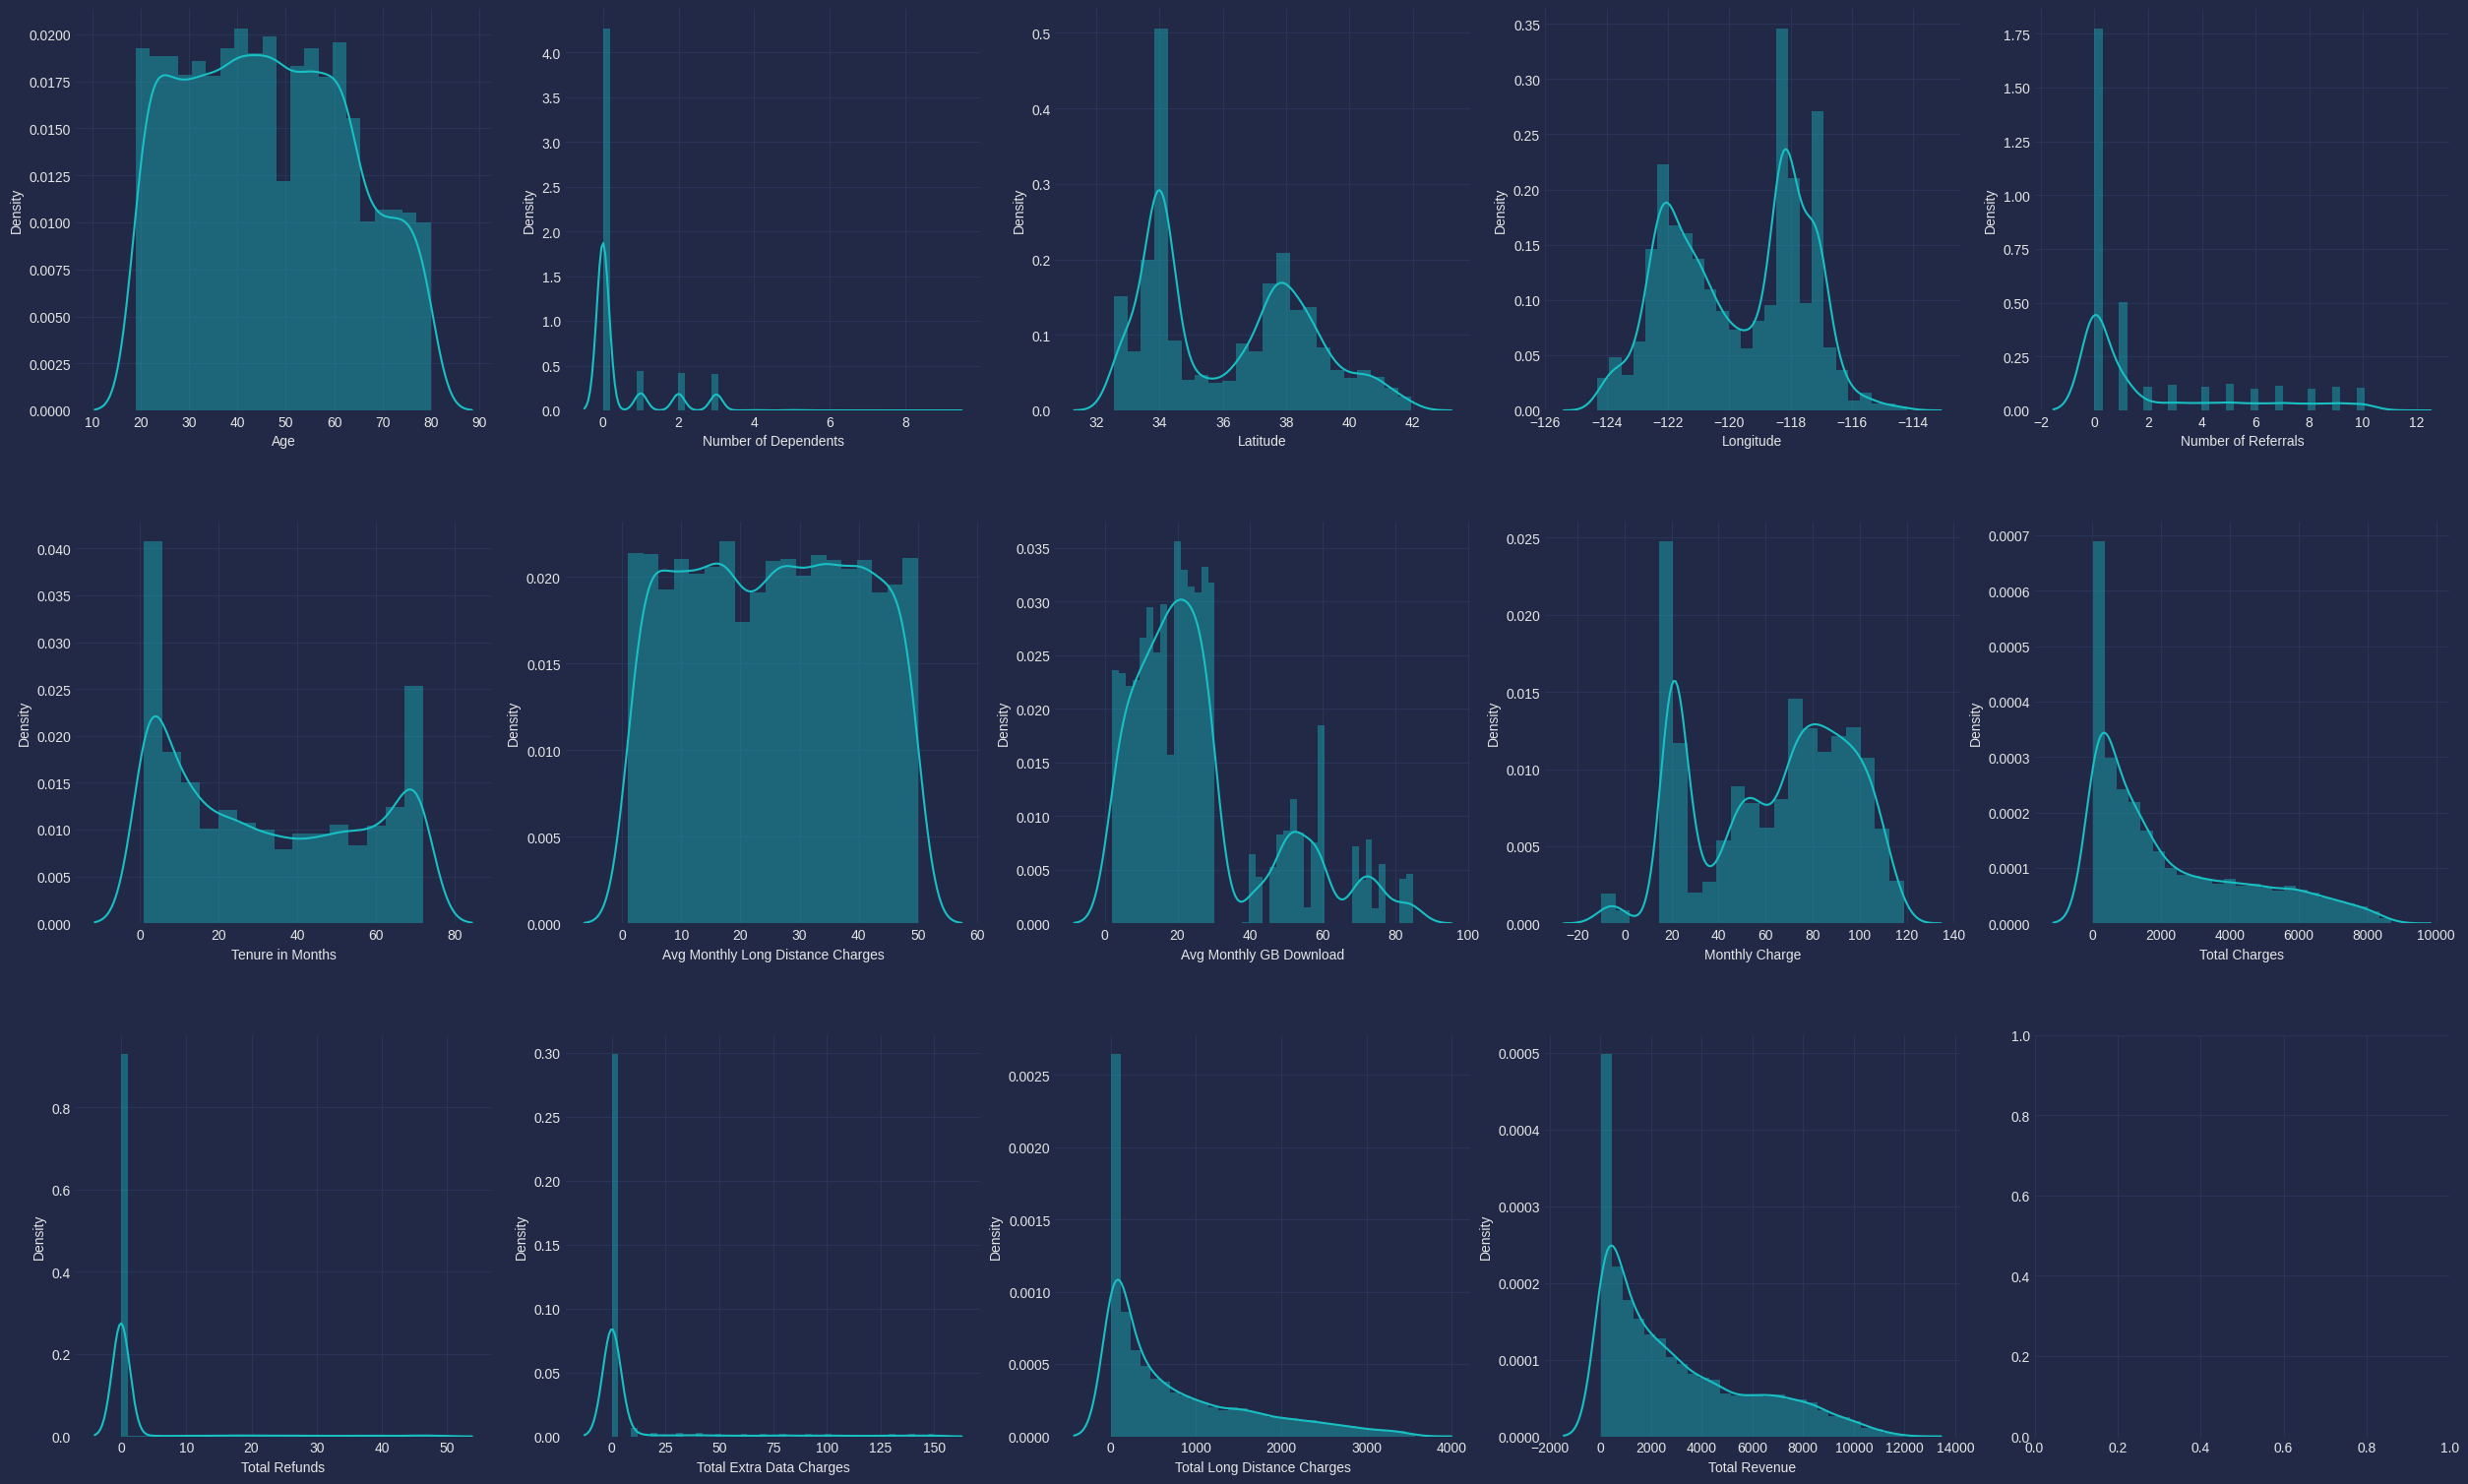

In [114]:
# visualization: distribution plot
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(25,15))
index = 0
axs = axs.flatten()
for k, v in df2.items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

Age                                      Avg Monthly GB Download
Number of Dependents                     Avg Monthly GB Download
Latitude                                               Longitude
Longitude                                               Latitude
Number of Referrals                             Tenure in Months
Tenure in Months                                   Total Revenue
Avg Monthly Long Distance Charges    Total Long Distance Charges
Avg Monthly GB Download                                      Age
Monthly Charge                                     Total Charges
Total Charges                                      Total Revenue
Total Refunds                                   Tenure in Months
Total Extra Data Charges                           Total Revenue
Total Long Distance Charges                        Total Revenue
Total Revenue                                      Total Charges
dtype: object

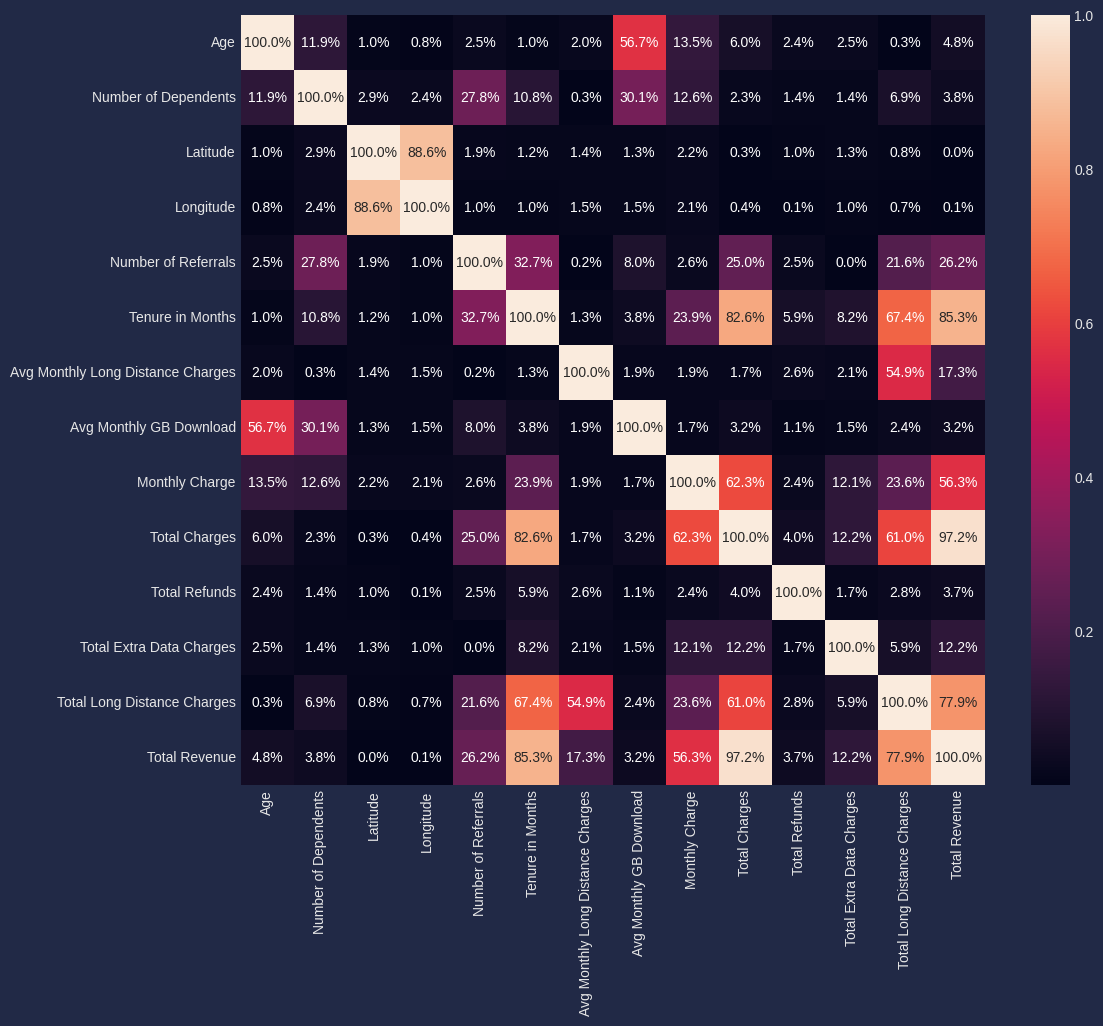

In [115]:
#heat map
corr_mat = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat.abs(), annot=True, fmt=".1%")

for x in range(len(df2.columns)):
  corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()

<div style="background-color:#87CEEB; padding:3px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>Correlation Observation:</strong>
    <p>Due to the significant correlation between <strong>Total Charges</strong> and <strong>Total Revenue</strong>, it is advisable to discard one of them.</p>
</div>

In [116]:
df2 = df2.drop(['Total Revenue'],axis=1)

<a id="8"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Filling Null Nalues in Numerical Features</p>
☝🏻 [Tabel of Contents](#contents_tabel)

null values in numerical features:
 Age                                     0
Number of Dependents                    0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges     682
Avg Monthly GB Download              1526
Monthly Charge                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
dtype: int64


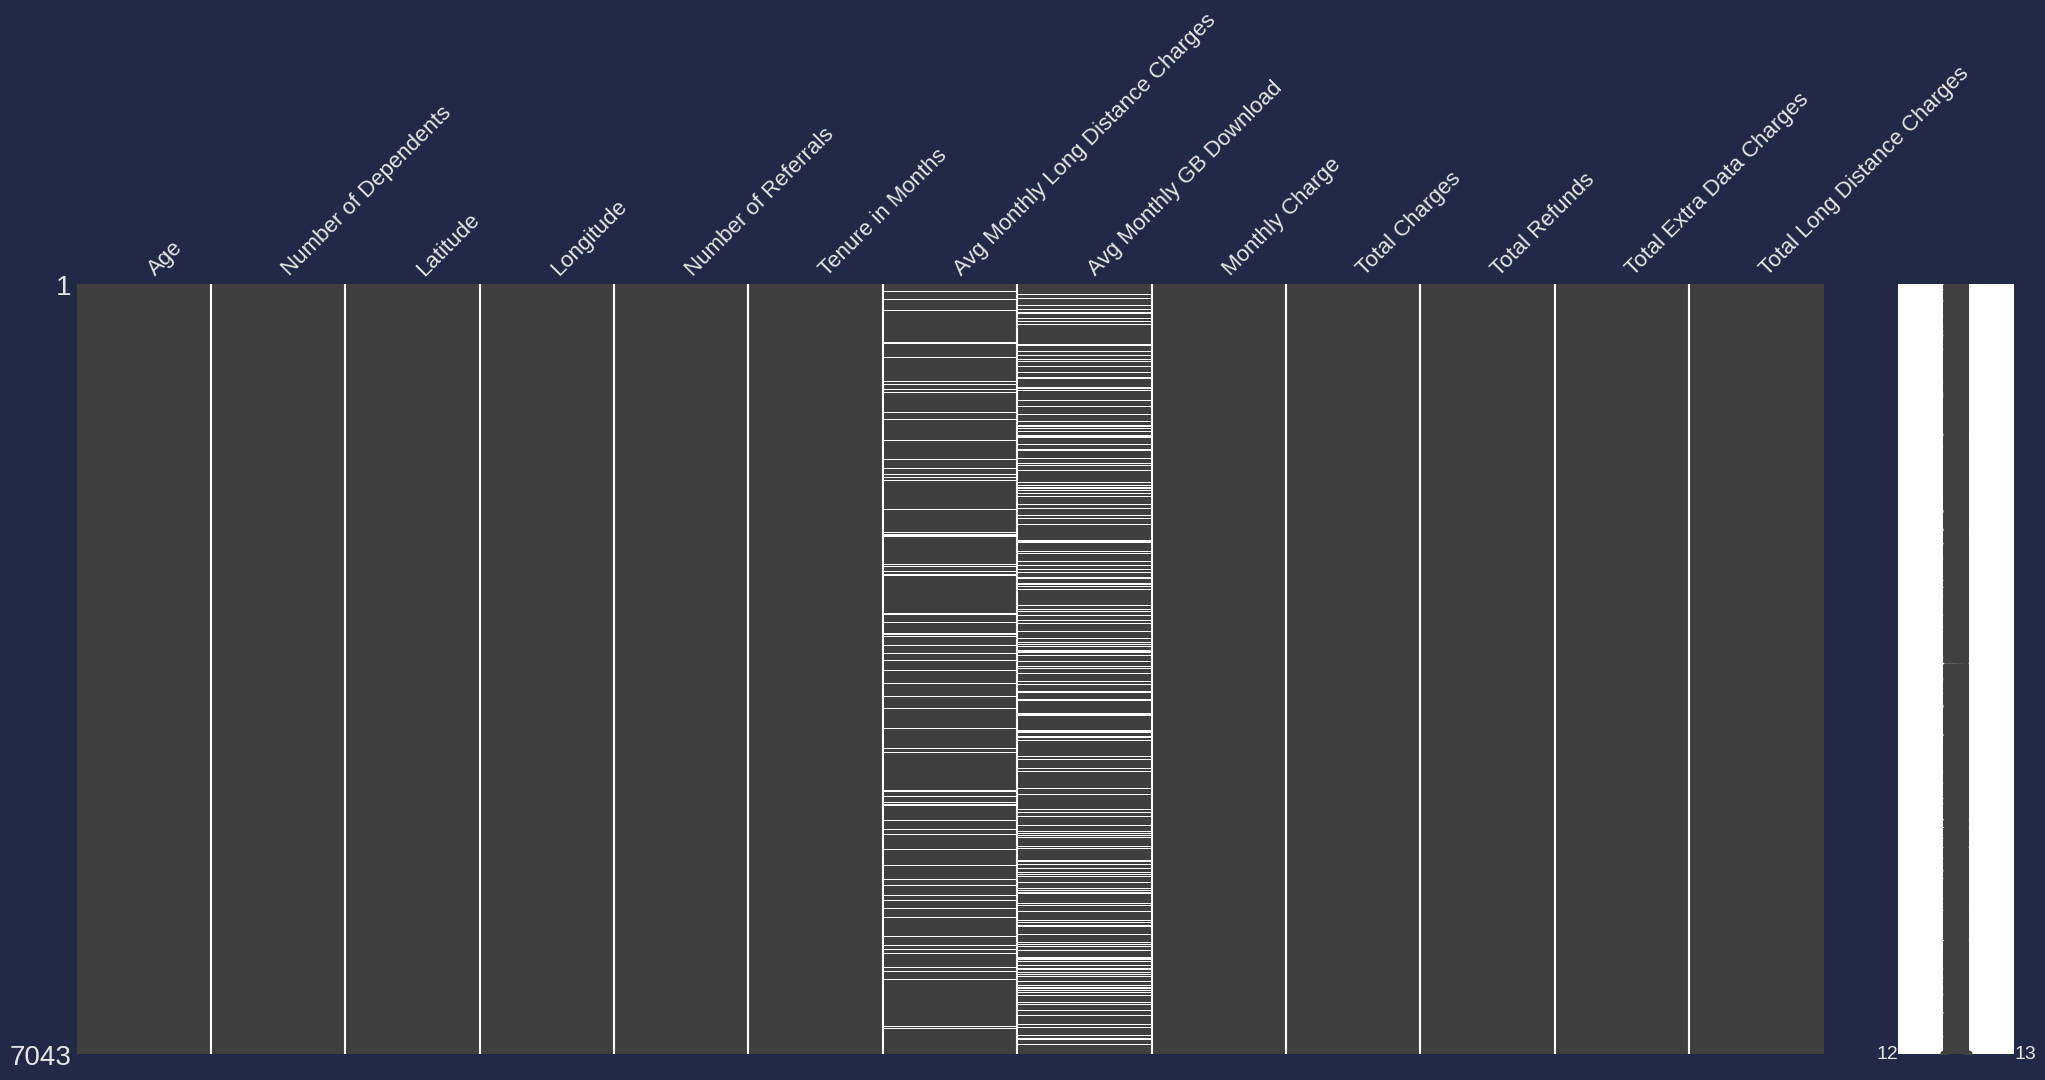

In [117]:
msno.matrix(df2)
print("null values in numerical features:\n",df2.isna().sum())

<div style="background-color:#87CEEB; padding:8px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <p>The "Internet service" category indicates whether customers have subscribed to the company's Internet service, with options being "Yes" or "No."</p>
    <p>A total of <strong>5,517</strong> customers have subscribed to internet services.</p>
    <p>Based on the preceding visualization, it is evident that the "<strong>Avg Monthly GB Download</strong>" feature is contingent upon internet service subscription. In simpler terms, this feature becomes active when a customer subscribes to the internet service.</p>
    <p>Therefore, it's observed that customers who haven't subscribed to internet services possess null values in this particular feature. As a result, to prepare the data for analysis, the null values in this column should be replaced with <strong>0</strong>.</p>
</div>

<div style="background-color:#87CEEB; padding:8px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <p>According to the information about this dataset in Kaggle, "<strong>Avg Monthly Long Distance Charges</strong>" indicate the customer's average long-distance charges, calculated to the end of the specified quarter. If the customer is not subscribed to home phone service, this will be <strong>0</strong>.</p>
</div>


In [118]:
#filling null values
column_name = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']
for column in column_name:
  df2[column] = df2[column].apply(lambda x: 0 if pd.isnull(x) else x)

null values in numerical features:
 Age                                  0
Number of Dependents                 0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
dtype: int64


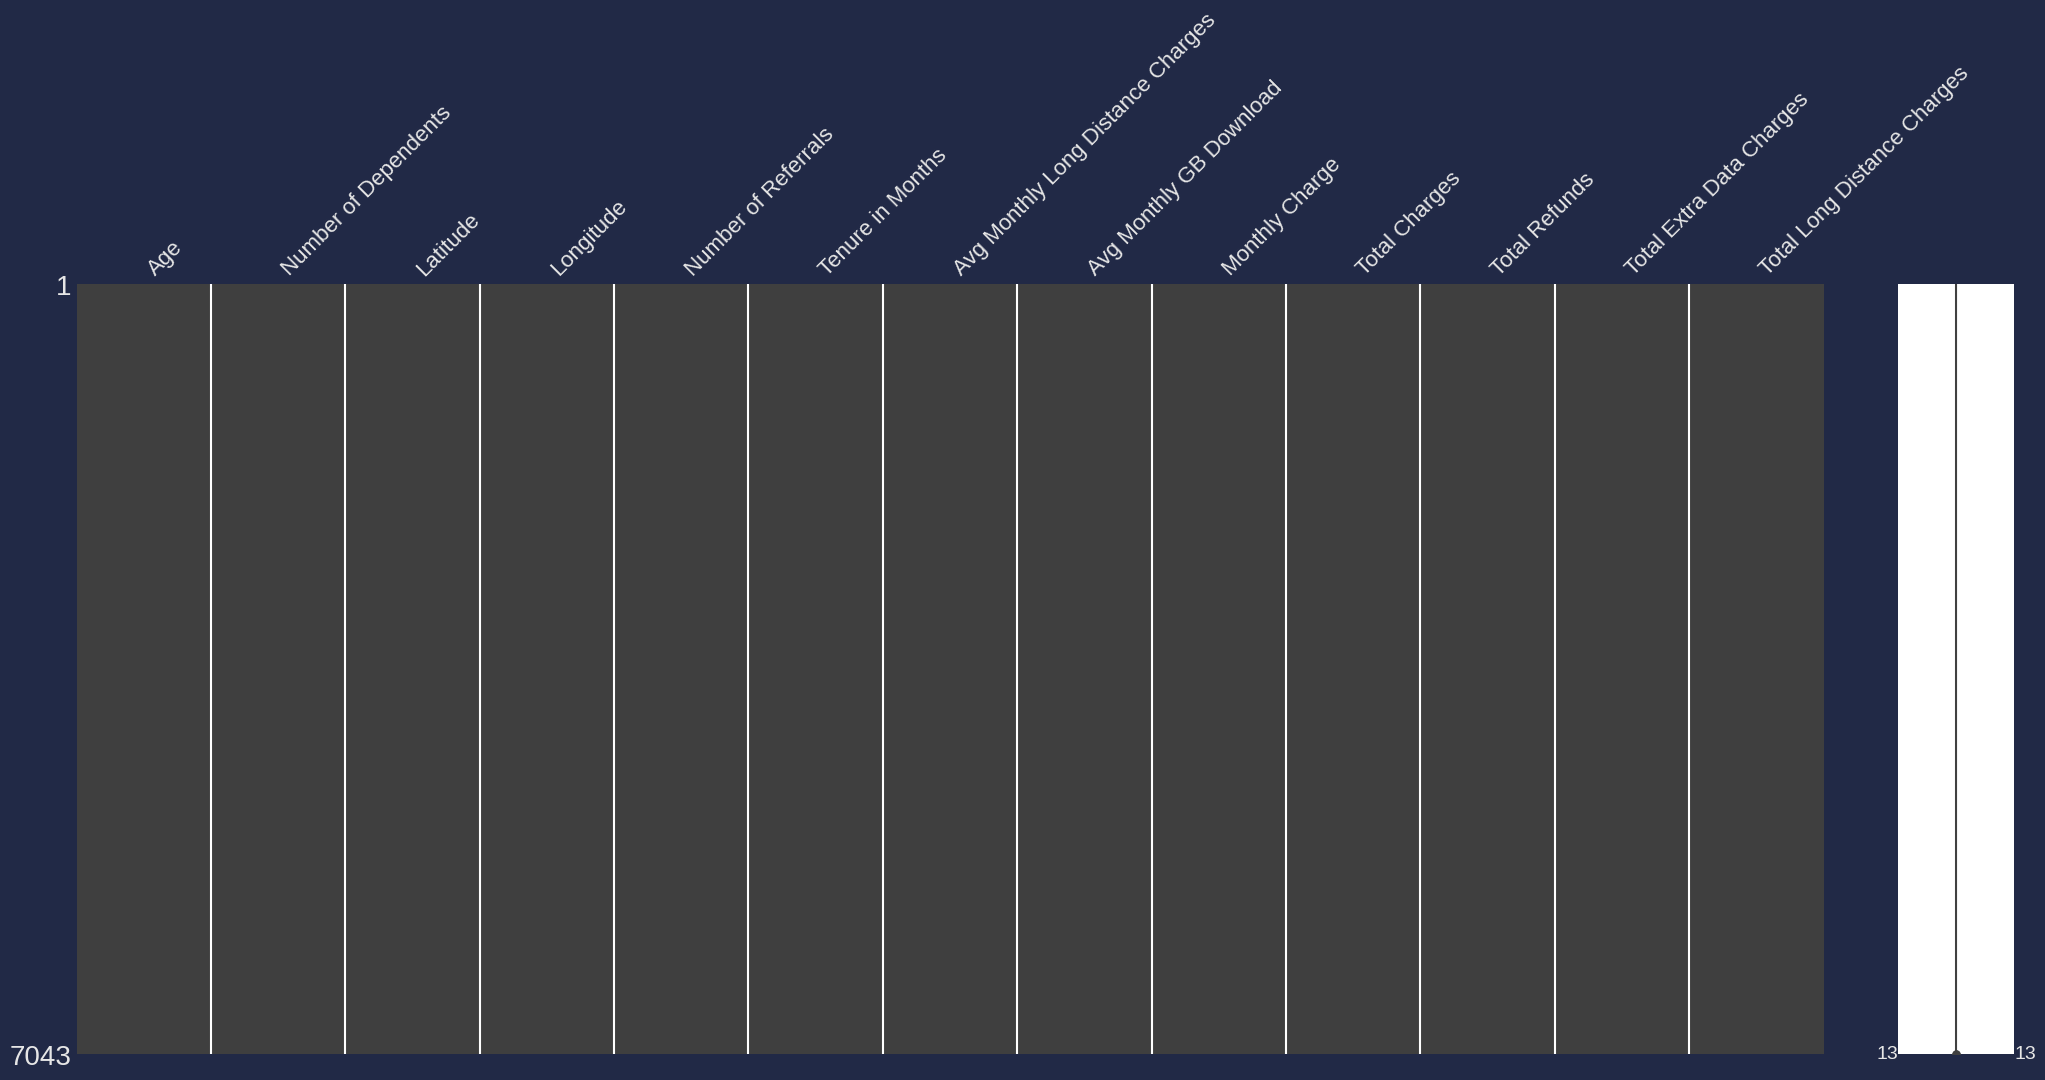

In [119]:
# checking null values
msno.matrix(df2)
print("null values in numerical features:\n",df2.isna().sum())

<a id="9"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Preprocessing(Normalization, Anomaly Detection, and Oversampling)</p>
☝🏻 [Tabel of Contents](#contents_tabel)

In [120]:
df = df2.join(df1_imputed)

In [121]:
X = df.drop(['Customer Status'], axis=1)
y = df.loc[:, 'Customer Status'].values

In [122]:
# Split Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Anomaly Detection
'''
# First method: Isolation Forests
ifor = IsolationForest(max_features=25, n_estimators=100,
                       random_state=np.random.RandomState(42),
                       contamination=0.05, warm_start=True)
y_train_pred = ifor.fit_predict(X_train_scaled)

# removing outliers(select only the normal data)
mask = y_train_pred != -1
X_train_scaled, y_train = X_train_scaled[mask], y_train[mask]
--------------------------------------------------------------

# Second method: Local Outlier Factor
LOF = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_train_pred = LOF.fit_predict(X_train_scaled)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train_scaled, y_train = X_train_scaled[mask], y_train[mask]
--------------------------------------------------------------

# third method: Elliptic
EE = EllipticEnvelope(contamination=0.05, random_state=42)
y_train_pred = EE.fit_predict(X_train_scaled)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train_scaled, y_train = X_train_scaled[mask], y_train[mask]
--------------------------------------------------------------
'''
# fourth method: One Class Support Vector Machine
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
y_train_pred = ocsvm.fit_predict(X_train)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train, y_train = X_train[mask], y_train[mask]

In [124]:
# Normalization/Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<div style="background-color:#87CEEB; padding:8px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>Addressing Imbalanced Labels:</strong>
    <p>Several preprocessing techniques address the issue of <strong>imbalanced labels</strong>. One common approach is to use resampling methods such as <strong>oversampling</strong> or <strong>undersampling</strong>. Oversampling increases the number of instances in the minority class while undersampling reduces the number of instances in the majority class.</p>
</div>

In [79]:
'''
# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)
'''

<div style="background-color:#87CEEB; padding:3px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>Oversampling Evaluation:</strong>
    <p>After implementing oversampling, a deterioration in the SVM score was observed, indicating a potential for overfitting compared to the model trained without oversampling. Therefore, the decision was made to revert to using the original label without any imbalance handling.</p>
    <p>The table below presents the scores obtained from model training after applying oversampling:</p>
    <table style="margin: 0 auto;">
        <tr>
            <th>Models</th>
            <th>Train Acc</th>
            <th>Test Acc</th>
            <th>Training Time</th>
        </tr>
        <tr>
            <td>SVM</td>
            <td>1.00</td>
            <td>0.77</td>
            <td>1.2633</td>
        </tr>
        <tr>
            <td>RF</td>
            <td>1.00</td>
            <td>0.83</td>
            <td>1.1465</td>
        </tr>
        <tr>
            <td>SVM + PCA</td>
            <td>0.99</td>
            <td>0.73</td>
            <td>2.0946</td>
        </tr>
        <tr>
            <td>RF + PCA</td>
            <td>1.00</td>
            <td>0.78</td>
            <td>1.0493</td>
        </tr>
    </table>
</div>


<a id="10"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Model Training without PCA</p>
<a id="11"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Model Selection: SVM</p>
☝🏻 [Tabel of Contents](#contents_tabel)

In [126]:
# GridSearch to determine the best hyperparameter in the SVM model
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svc = SVC()

# Instantiate the grid search model
grid_search_SVC = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_SVC.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search_SVC.best_params_
best_score = grid_search_SVC.best_score_

print(f"Best parameters in SVC: {best_params}")
print(f"Best cross-validation score in SVC: {best_score}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters in SVC: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score in SVC: 0.8221054166495787


In [127]:
# using best estimator to make predictions on the test set
best_model_SVC = grid_search_SVC.best_estimator_

In [128]:
# training ohase for best hyperparameter
start_tra = perf_counter()
best_model_SVC.fit(X_train, y_train)
end_tra = perf_counter()

In [129]:
# print classification report and confusion matrix
y_pred = best_model_SVC.predict(X_test)

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))


def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1


accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1    2
Actual                 
0          270  16   87
1           41  54    2
2          106   3  830
accuracy = 0.819 
precision = 0.824 
recall = 0.819 
f1 = 0.820


In [130]:
# Accuracy on Train
train_score_SVC = round(best_model_SVC.score(X_train, y_train), 2)
print("The Training Accuracy is: ", train_score_SVC)

# Accuracy on Test
test_score_SVC = round(best_model_SVC.score(X_test, y_test), 2)
print("The Testing Accuracy is: ", test_score_SVC)

#training time
train_time_SVC = round((end_tra-start_tra), 4)
print(f'train phase time: ', train_time_SVC)

The Training Accuracy is:  0.84
The Testing Accuracy is:  0.82
train phase time:  0.6382


<a id="12"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Model Selection: Random Forest</p>
☝🏻 [Tabel of Contents](#contents_tabel)

In [131]:
# GridSearch to determine the best hyperparameter in the RF model
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
}


rfc = RandomForestClassifier(random_state=42)
grid_search_RF = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


# Fit the grid search to the data
grid_search_RF.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search_RF.best_params_
best_score = grid_search_RF.best_score_

print(f"Best parameters in RF: {best_params}")
print(f"Best cross-validation score in RF: {best_score}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters in RF: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 300}
Best cross-validation score in RF: 0.8293605822504281


In [132]:
best_model_RF = grid_search_RF.best_estimator_

In [133]:
start_tra = perf_counter()
best_model_RF.fit(X_train, y_train)
end_tra = perf_counter()

In [134]:
# print classification report and confusion matrix
y_pred = best_model_RF.predict(X_test)

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1    2
Actual                 
0          225  19  129
1           44  53    0
2           41   0  898
accuracy = 0.835 
precision = 0.826 
recall = 0.835 
f1 = 0.826


In [135]:
# Accuracy on Train
train_score_RF = round(best_model_RF.score(X_train, y_train), 2)
print("The Training Accuracy is: ", train_score_RF)

# Accuracy on Test
test_score_RF = round(best_model_RF.score(X_test, y_test), 2)
print("The Testing Accuracy is: ", test_score_RF)

#training time
train_time_RF = round((end_tra-start_tra), 4)
print(f'train phase time: ', train_time_RF)

The Training Accuracy is:  0.92
The Testing Accuracy is:  0.83
train phase time:  1.5853


<a id="13"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Model Training with PCA</p>
☝🏻 [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:8px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>Elbow Chart for Determining Best n_component</strong>
    <p>An elbow chart is utilized to determine the optimal number of components (<strong>n_component</strong>) for dimensionality reduction techniques such as PCA (Principal Component Analysis).</p>
</div>


In [136]:
# PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

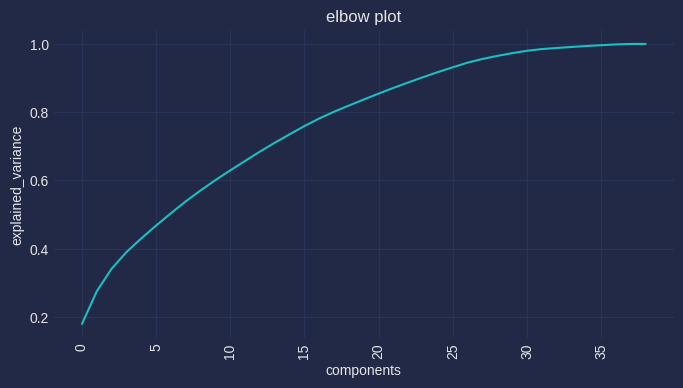

In [137]:
# Determining best n_component for PCA
PC_list = ['PC'+str(i+1) for i in range(39)]

#plotting setup
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 100

plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=90)

In [138]:
total_var = np.cumsum(pca.explained_variance_ratio_*100)

for i in range(38):
  print('PC{:2d}, explained_variance: {:0.2f}'.format(i+1, total_var[i]))

PC 1, explained_variance: 17.94
PC 2, explained_variance: 27.52
PC 3, explained_variance: 34.14
PC 4, explained_variance: 39.01
PC 5, explained_variance: 43.02
PC 6, explained_variance: 46.78
PC 7, explained_variance: 50.40
PC 8, explained_variance: 53.88
PC 9, explained_variance: 57.09
PC10, explained_variance: 60.10
PC11, explained_variance: 62.96
PC12, explained_variance: 65.73
PC13, explained_variance: 68.46
PC14, explained_variance: 71.05
PC15, explained_variance: 73.52
PC16, explained_variance: 75.94
PC17, explained_variance: 78.17
PC18, explained_variance: 80.15
PC19, explained_variance: 81.95
PC20, explained_variance: 83.73
PC21, explained_variance: 85.45
PC22, explained_variance: 87.12
PC23, explained_variance: 88.72
PC24, explained_variance: 90.27
PC25, explained_variance: 91.77
PC26, explained_variance: 93.16
PC27, explained_variance: 94.53
PC28, explained_variance: 95.61
PC29, explained_variance: 96.50
PC30, explained_variance: 97.30
PC31, explained_variance: 97.99
PC32, ex

<div style="background-color:#87CEEB; padding:8px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#FFFFFF; font-size:100%; text-align:center; border-radius:20px 60px;">
    <strong>Optimal n_component:</strong>
    <p>Based on the analysis, setting <strong>n_component</strong> to <strong>16</strong> retains <strong>75%</strong> of the information, indicating an effective balance between dimensionality reduction and information retention.</p>
</div>


In [140]:
pca = PCA(n_components=16)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

<a id="14"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Model Selection: SVM</p>
☝🏻 [Tabel of Contents](#contents_tabel)

In [141]:
# GridSearch to determine the best hyperparameter in the SVM model
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svc = SVC()

# Instantiate the grid search model
grid_search_SVC_PCA = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_SVC_PCA.fit(X_train_pca, y_train)

# Get the best parameters and the best score
best_params = grid_search_SVC_PCA.best_params_
best_score = grid_search_SVC_PCA.best_score_

print(f"Best parameters in SVC: {best_params}")
print(f"Best cross-validation score in SVC: {best_score}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters in SVC: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score in SVC: 0.7777086665481903


In [142]:
best_model_SVC_PCA = grid_search_SVC_PCA.best_estimator_

In [143]:
# training ohase for best hyperparameter
start_tra = perf_counter()
best_model_SVC_PCA.fit(X_train_pca, y_train)
end_tra = perf_counter()

In [144]:
# print classification report and confusion matrix
y_pred = best_model_SVC_PCA.predict(X_test_pca)

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1    2
Actual                 
0          242   9  122
1           45  25   27
2           84  14  841
accuracy = 0.786 
precision = 0.775 
recall = 0.786 
f1 = 0.777


In [145]:
# Accuracy on Train
train_score_SVC_PCA = round(best_model_SVC_PCA.score(X_train_pca, y_train), 2)
print("The Training Accuracy is: ", train_score_SVC_PCA)

# Accuracy on Test
test_score_SVC_PCA = round(best_model_SVC_PCA.score(X_test_pca, y_test), 2)
print("The Testing Accuracy is: ", test_score_SVC_PCA)

#training time
train_time_SVC_PCA = round((end_tra-start_tra), 4)
print(f'train phase time: ', train_time_SVC_PCA)

The Training Accuracy is:  0.86
The Testing Accuracy is:  0.79
train phase time:  0.4418


<a id="15"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Model Selection: Random Forest</p>
☝🏻 [Tabel of Contents](#contents_tabel)

In [146]:
# GridSearch to determine the best hyperparameter in the RF model
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}


rfc = RandomForestClassifier(random_state=42)
grid_search_RF_PCA = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


# Fit the grid search to the data
grid_search_RF_PCA.fit(X_train_pca, y_train)

# Get the best parameters and the best score
best_params = grid_search_RF_PCA.best_params_
best_score = grid_search_RF_PCA.best_score_

print(f"Best parameters in RF: {best_params}")
print(f"Best cross-validation score in RF: {best_score}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters in RF: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 300}
Best cross-validation score in RF: 0.7858628860245006


In [147]:
best_model_RF_PCA = grid_search_RF_PCA.best_estimator_

In [148]:
start_tra = perf_counter()
best_model_RF_PCA.fit(X_train_pca, y_train)
end_tra = perf_counter()

In [149]:
# print classification report and confusion matrix
y_pred = best_model_RF_PCA.predict(X_test_pca)

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1    2
Actual                 
0          235   9  129
1           43  20   34
2           79  10  850
accuracy = 0.784 
precision = 0.769 
recall = 0.784 
f1 = 0.771


In [150]:
# Accuracy on Train
train_score_RF_PCA = round(best_model_RF_PCA.score(X_train_pca, y_train), 2)
print("The Training Accuracy is: ", train_score_RF_PCA)

# Accuracy on Test
test_score_RF_PCA = round(best_model_RF_PCA.score(X_test_pca, y_test), 2)
print("The Testing Accuracy is: ", test_score_RF_PCA)

#training time
train_time_RF_PCA = round((end_tra-start_tra), 4)
print(f'train phase time: ', train_time_RF_PCA)

The Training Accuracy is:  0.91
The Testing Accuracy is:  0.78
train phase time:  4.0044


<a id="16"></a>
# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Conclosion</p>
☝🏻 [Tabel of Contents](#contents_tabel)

In [151]:
Conclusion = pd.DataFrame({'Models':['SVM', 'RF', 'SVM + PCA', 'RF + PCA'],
                          'train acc'               :[train_score_SVC,train_score_RF, train_score_SVC_PCA, train_score_RF_PCA],
                          'test acc'                :[test_score_SVC, test_score_RF,  test_score_SVC_PCA,  test_score_RF_PCA],
                          'training time'           :[train_time_SVC, train_time_RF,  train_time_SVC_PCA,  train_time_RF_PCA]})

Conclusion

,Models,train acc,test acc,training time
0,SVM,0.84,0.82,0.6382
1,RF,0.92,0.83,1.5853
2,SVM + PCA,0.86,0.79,0.4418
3,RF + PCA,0.91,0.78,4.0044


# <p style="background-color:#fdf6e3; padding:10px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#657b83; font-size:150%;text-align:center;border-radius:20px 60px;"> Thanks for Your Attention</p>